In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten,UpSampling2D
import os
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/cats'

In [ ]:
images=[]
for i in os.listdir(path):
  img = Image.open(os.path.join(path,i))
  arr = np.array(img)
  r_arr = np.array(Image.fromarray(arr).resize((64,64)))
  images.append(r_arr)

In [ ]:
x_train  = np.array(images)

In [ ]:
x_test = x_train[:100]
x_train = x_train[100:]

In [ ]:
x_test = np.array(x_test)
x_train  = np.array(x_train)

In [ ]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [ ]:
x_test.shape

(100, 64, 64, 3)

In [ ]:
x_train.shape

(2890, 64, 64, 3)

In [ ]:
model = Sequential()
# encoder network
model.add(Conv2D(32, 3, activation= 'relu', padding='same', input_shape = (64,64,3)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(16, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(16, 3, activation= 'relu', padding='same'))


#decoder network
model.add(Conv2D(16, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(32,3,activation='relu', padding= 'same')) # output layer
model.add(UpSampling2D(2))

model.add(Conv2D(3,3,activation='relu', padding= 'same'))

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_76 (Conv2D)          (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_77 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_78 (Conv2D)          (None, 16, 16, 16)      

In [ ]:
model.compile(optimizer= 'adam', loss = 'mse',metrics=['acc'])

In [ ]:
model.fit(x_train, x_train,
                epochs=15,
                batch_size=32,
                validation_data=(x_test, x_test))

Epoch 1/15
91/91 [==============================] - 35s 370ms/step - loss: 0.0445 - acc: 0.5750 - val_loss: 0.0098 - val_acc: 0.6862
Epoch 2/15
91/91 [==============================] - 32s 354ms/step - loss: 0.0084 - acc: 0.6791 - val_loss: 0.0072 - val_acc: 0.6680
Epoch 3/15
91/91 [==============================] - 34s 369ms/step - loss: 0.0070 - acc: 0.6966 - val_loss: 0.0063 - val_acc: 0.6836
Epoch 4/15
91/91 [==============================] - 35s 386ms/step - loss: 0.0062 - acc: 0.7063 - val_loss: 0.0058 - val_acc: 0.6939
Epoch 5/15
91/91 [==============================] - 33s 363ms/step - loss: 0.0057 - acc: 0.7143 - val_loss: 0.0055 - val_acc: 0.7135
Epoch 6/15
91/91 [==============================] - 33s 361ms/step - loss: 0.0052 - acc: 0.7284 - val_loss: 0.0051 - val_acc: 0.7145
Epoch 7/15
91/91 [==============================] - 35s 380ms/step - loss: 0.0049 - acc: 0.7423 - val_loss: 0.0047 - val_acc: 0.7178
Epoch 8/15
91/91 [==============================] - 33s 363ms/step - 

In [ ]:
pred = model.predict(x_test)

4/4 [==============================] - 1s 99ms/step


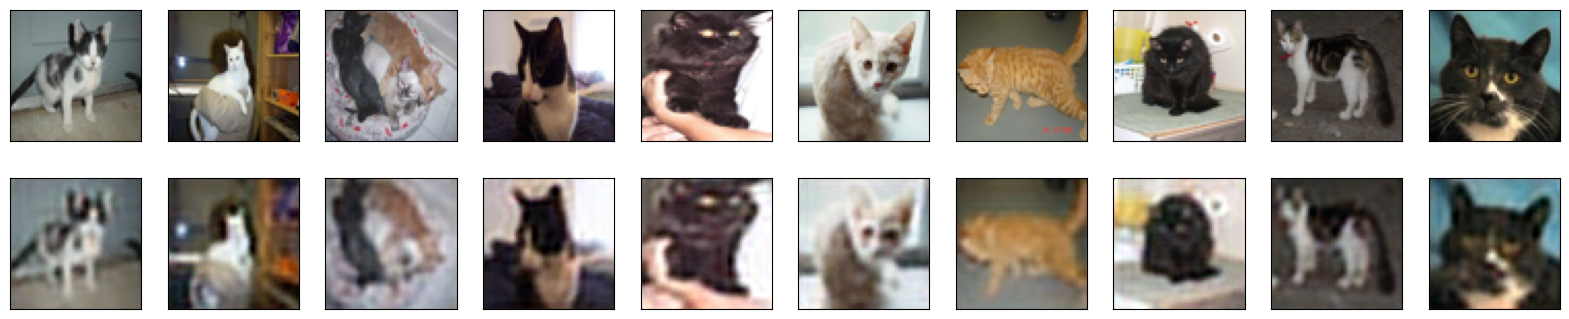

In [ ]:
n=10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
noise_factor = 0.7
x_train_noisy = noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
model.save('cnnauto.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
pred = model.predict(x_test_noisy)

4/4 [==============================] - 0s 53ms/step


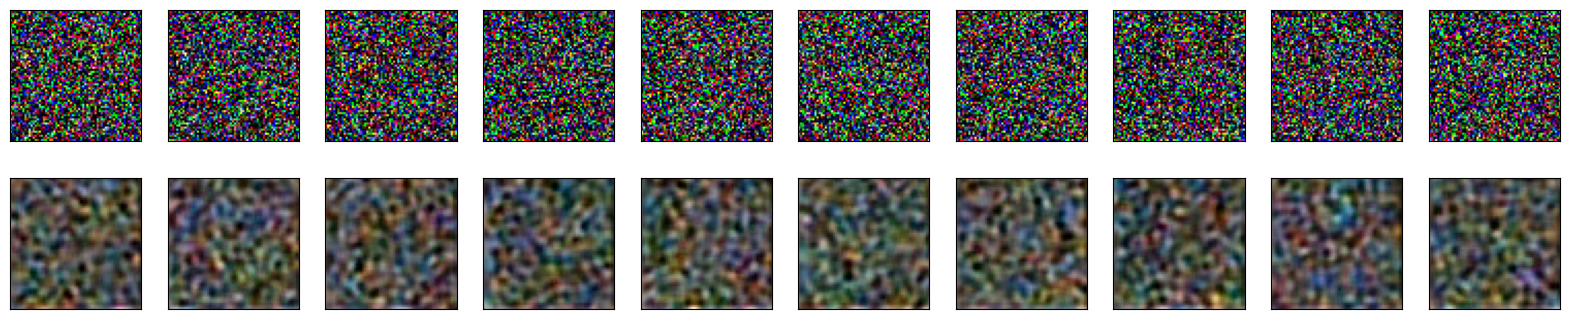

In [ ]:
n=10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
photo=[]

In [ ]:
path2 = '/content/drive/My Drive/cat_dog/dog'

In [ ]:
i=0
pt = os.listdir(path2)
print(pt[i])
print(os.path.join(path2,pt[i]))
img =  Image.open(os.path.join(path2,pt[i]))
arr = np.array(img)
r_arr = np.array(Image.fromarray(arr).resize((64,64)))


0a73823599.jpg
/content/drive/My Drive/cat_dog/dog/0a73823599.jpg


In [ ]:
t = np.array(photo)
t.shape

(3070, 64, 64, 3)

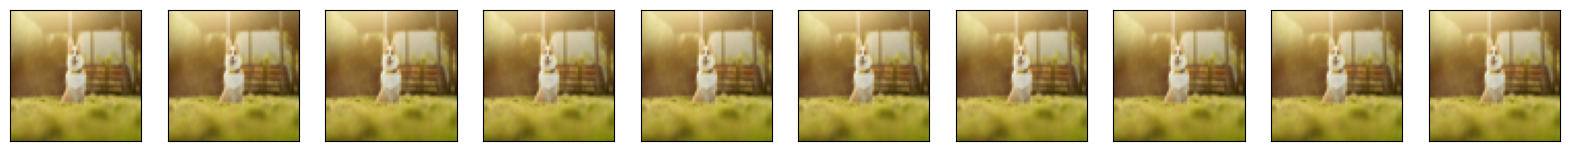

In [ ]:
n=10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(t[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
pred = model.predict(t)

96/96 [==============================] - 9s 96ms/step


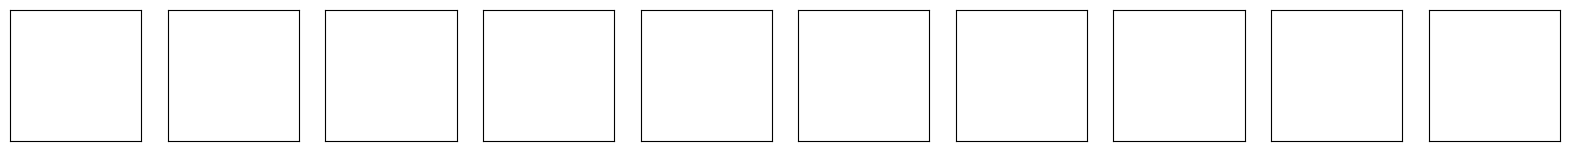

In [ ]:
n=10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(pred[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)